The data for this analysis is Audible Dataset taken from [Kaggle](https://www.kaggle.com/datasets/snehangsude/audible-dataset?resource=download)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
audible = pd.read_csv('../Audible_data/audible_uncleaned.csv')

### Quick overview of the data

In [3]:
# column names
audible.columns

Index(['name', 'author', 'narrator', 'time', 'releasedate', 'language',
       'stars', 'price'],
      dtype='object')

In [4]:
# number of rows and columns
audible.shape

(87489, 8)

In [5]:
# first and random few rows
audible.head(10)
audible.sample(20)

,name,author,narrator,time,releasedate,language,stars,price
71060,The Crow Brothers,Writtenby:S.L.Scott,"Narratedby:SebastianYork,AvaErickson,JasonClarke,",40 hrs and 31 mins,24-02-20,English,4 out of 5 stars1 rating,"1,003.00"
66360,Christian Basics,Writtenby:RobertM.West,Narratedby:WilliamSarris,3 hrs and 32 mins,03-01-22,English,Not rated yet,351.00
54957,By the Book,Writtenby:JuliaSonneborn,Narratedby:AmyMcFadden,9 hrs and 44 mins,06-02-18,English,4 out of 5 stars1 rating,"1,005.00"
76621,Wicked Liars,Writtenby:LauraLee,"Narratedby:LidiaDornet,SorenGray",6 hrs and 41 mins,26-01-21,English,Not rated yet,"1,005.00"
17129,Country Music,Writtenby:RichardCarlin,Narratedby:MichaelButlerMurray,4 hrs and 2 mins,28-04-20,English,Not rated yet,469.00
81948,Russian Language for 8th Grade [Russian Edition],Writtenby:S.Stepnoy,Narratedby:OksanaBorisenko,3 hrs and 44 mins,26-03-13,russian,Not rated yet,117.00
26266,Howard Marks' Book of Dope Stories,Writtenby:HowardMarks,Narratedby:HowardMarks,3 hrs and 5 mins,08-02-07,English,3 out of 5 stars1 rating,410.00
72811,Their Wild Sea,Writtenby:MillyTaiden,Narratedby:ElizabethRussell,5 hrs and 28 mins,16-02-21,English,Not rated yet,469.00
28914,The Closer's 21 Proven Secrets to Close More W...,Writtenby:TonyRobinson,Narratedby:TonyRobinsonJr.,52 mins,01-02-19,English,Not rated yet,132.00
23304,Flamin' Hot,Writtenby:RichardMontanez,"Narratedby:StevenMontañez,RichardMontanez",6 hrs and 21 mins,15-06-21,English,Not rated yet,879.00


In [6]:
# check for duplicates
audible.duplicated().sum()

0

In [7]:
#remove the duplicated row
audible.drop_duplicates(inplace = True)

In [8]:
#column types, number of non-null values
audible.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 6.0+ MB


In [9]:
# number of unique values
audible.nunique()

name           82767
author         48374
narrator       29717
time            2284
releasedate     5058
language          36
stars            665
price           1011
dtype: int64

### Converting object columns into more suitable data types

In [10]:
# converting Release date column to date type
audible.releasedate = pd.to_datetime(audible.releasedate)

In [11]:
# converting Price column to numeric type
audible.price = pd.to_numeric(audible.price.str.replace(',', '').str.replace('Free', '0'))

In [12]:
# Time column is in the format not suitable to analysis. The goal is to convert it to minutes

## 1. checking all patterns in the column
audible['time_pattern'] = audible.time.str.replace(r'\d+', '0', regex = True)
audible['time_pattern'].unique()

array(['0 hrs and 0 mins', '0 hrs', '0 hrs and 0 min', '0 hr and 0 mins',
       '0 mins', '0 hr', '0 hr and 0 min', '0 min', 'Less than 0 minute'],
      dtype=object)

In [13]:
## 2. checking the variety of 'Less then ...' pattern
audible[audible.time.str.contains('Less than')]['time'].unique()

array(['Less than 1 minute'], dtype=object)

In [14]:
## the only tracks with this pattern are those shorter than 1 minute

## 3. since tracks can't be 0 min long and the exact length is unknown, replace it with 1 min 
audible['time_in_min'] = audible.time.str.replace('Less than 1 minute', '1 min')
## check that all data was replaced
audible[audible.time_in_min.str.contains('Less')]

,name,author,narrator,time,releasedate,language,stars,price,time_pattern,time_in_min


In [15]:
## 4. unifying the pattern
audible.time_in_min = audible.time_in_min.str.replace('and', '|').str.replace('hrs', 'hr').str.replace('mins', 'min')

In [16]:
### finding columns with only minutes or hours
audible['only_h'] = ((audible.time_in_min.str.contains('hr') == True)
                        & (audible.time_in_min.str.contains('min') == False))
audible['only_m'] = ((audible.time_in_min.str.contains('hr') == False)
                        & (audible.time_in_min.str.contains('min') == True))

In [17]:
audible.time_in_min = np.where(audible.only_h == True, audible.time_in_min + ' | 0 min', audible.time_in_min)
audible.time_in_min = np.where(audible.only_m == True, '0 hr | ' + audible.time_in_min, audible.time_in_min)

In [18]:
audible[audible.only_m == True].sample(10)
audible[audible.only_h == True].sample(10)

,name,author,narrator,time,releasedate,language,stars,price,time_pattern,time_in_min,only_h,only_m
50946,Murder at the Royal Botanic Gardens,Writtenby:AndreaPenrose,Narratedby:JamesCameronStewart,12 hrs,2021-09-28,English,Not rated yet,703.0,0 hrs,12 hr | 0 min,True,False
20290,Головокружение от успехов. Избранное. С коммен...,Writtenby:ИосифСталин,Narratedby:ИгорьПронин,14 hrs,2022-07-02,russian,Not rated yet,65.0,0 hrs,14 hr | 0 min,True,False
82875,Het lied van Ariane,Writtenby:PetraDoom,Narratedby:NienkeCusell,12 hrs,2022-01-31,dutch,Not rated yet,267.0,0 hrs,12 hr | 0 min,True,False
65859,Konfuzius. Buddha. Jesus von Nazareth. Mohammed,Writtenby:SiddharthaGautama,Narratedby:AchimHöppner,1 hr,2008-06-25,german,Not rated yet,233.0,0 hr,1 hr | 0 min,True,False
7833,The Little Prince,"Writtenby:AntoinedeSaint-Exupéry,TheoCuffe-tra...",Narratedby:OssianPerret,2 hrs,2022-03-31,English,Not rated yet,410.0,0 hrs,2 hr | 0 min,True,False
15357,Master Thieves,Writtenby:StephenKurkjian,Narratedby:MikeChamberlain,7 hrs,2015-03-17,English,Not rated yet,891.0,0 hrs,7 hr | 0 min,True,False
42160,¡Organicémonos! [Let's Get Organized!],Writtenby:SantosOmarMedranoChura,Narratedby:ElenaN.,2 hrs,2021-11-30,spanish,Not rated yet,164.0,0 hrs,2 hr | 0 min,True,False
35135,Who Says You're Dead?,Writtenby:JacobM.AppelMD,Narratedby:JonathanYen,8 hrs,2019-08-10,English,Not rated yet,586.0,0 hrs,8 hr | 0 min,True,False
44066,L'encre du passé 2,Writtenby:ErikaBoyer,"Narratedby:BenoîtBerthon,LionelMonier",8 hrs,2021-07-15,french,Not rated yet,490.0,0 hrs,8 hr | 0 min,True,False
41522,ホモ・デウス 下: テクノロジーとサピエンスの未来,"Writtenby:ユヴァル・ノア・ハラリ,柴田裕之",Narratedby:岩見聖次,11 hrs,2020-07-31,japanese,Not rated yet,976.0,0 hrs,11 hr | 0 min,True,False


In [19]:
## 5. creating 2 columns: hours and mins
audible[['hrs', 'mins']] = audible.time_in_min.str.split('|', n = 2, expand = True)

In [20]:
## 6. calculating length in minutes and length in hours columns and delete the helper columns
audible['hrs'] = audible.hrs.str.replace(' hr', '').str.replace(' hr ', '').str.strip().astype(int)
audible['mins'] = audible.mins.str.replace(' min', '').str.strip().astype(int)
audible['length_in_min'] = audible.hrs * 60 + audible.mins
audible['length_in_hrs'] = round(audible.length_in_min/60,2)
audible.drop(['time', 'time_in_min', 'time_pattern', 'only_h', 'only_m', 'hrs', 'mins'], axis = 1, inplace = True)

In [21]:
#creating 3 numeric columns: rating, maximun possible rating, and number of ratings from the Starts column
audible[['rating', 'num_of_ratings']] = audible.stars.str.split('stars', n = 2, expand = True) 

In [22]:
audible[['ratings', 'max_rating']] = audible.rating.str.split('out of', expand = True)

In [23]:
# checking if the maximun rating is the same for every item
audible.max_rating.unique()

array([' 5 ', None], dtype=object)

In [24]:
# since the maximum rating is 5 for all the rated items, it's is the same across the database
audible['max_rating'] = audible['max_rating'].astype(str).str.replace('None', '5').str.strip().astype(int)

In [25]:
#replacing 'Not rated' with NAN and convert the column into numeric
audible['ratings'] = audible.ratings.str.strip()
audible['ratings'] = np.where(audible.ratings == 'Not rated yet', np.nan, audible.ratings).astype(float)

In [26]:
#converting the column into numeric
audible['num_of_ratings'] = (audible.num_of_ratings.str.replace(' ratings','')
                                                  .str.replace(' rating','')
                                                  .str.replace(',','')
                                                  .str.strip())
audible['num_of_ratings'] = pd.to_numeric(np.where(audible['num_of_ratings'] == 'None', np.nan, audible['num_of_ratings']))

In [27]:
# the original stars and rating columns are no longer needed, deleting them
audible.drop('rating', axis = 1, inplace = True)
audible.drop('stars', axis = 1, inplace = True)

In [28]:
# unifying how the languages are written
np.sort(audible.language.unique())

array(['English', 'Hindi', 'afrikaans', 'arabic', 'basque', 'bulgarian',
       'catalan', 'czech', 'danish', 'dutch', 'finnish', 'french',
       'galician', 'german', 'greek', 'hebrew', 'hungarian', 'icelandic',
       'italian', 'japanese', 'korean', 'lithuanian', 'mandarin_chinese',
       'norwegian', 'polish', 'portuguese', 'romanian', 'russian',
       'slovene', 'spanish', 'swedish', 'tamil', 'telugu', 'turkish',
       'ukrainian', 'urdu'], dtype=object)

In [29]:
audible.language = audible.language.str.capitalize()
np.sort(audible.language.unique())

array(['Afrikaans', 'Arabic', 'Basque', 'Bulgarian', 'Catalan', 'Czech',
       'Danish', 'Dutch', 'English', 'Finnish', 'French', 'Galician',
       'German', 'Greek', 'Hebrew', 'Hindi', 'Hungarian', 'Icelandic',
       'Italian', 'Japanese', 'Korean', 'Lithuanian', 'Mandarin_chinese',
       'Norwegian', 'Polish', 'Portuguese', 'Romanian', 'Russian',
       'Slovene', 'Spanish', 'Swedish', 'Tamil', 'Telugu', 'Turkish',
       'Ukrainian', 'Urdu'], dtype=object)

In [30]:
# cleaning up the Author and Narrator columns
audible['author'] = audible.author.str.replace('Writtenby:','')
audible['narrator'] = audible.narrator.str.replace('Narratedby:','')

In [31]:
# adding space between name and surname
audible['author'] = audible['author'].str.findall('[a-z]+|[A-Z][a-z]*').apply(' '.join)
audible['narrator'] = audible['narrator'].str.findall('[a-z]+|[A-Z][a-z]*').apply(' '.join)


In [32]:
# renaming the price column 
audible.rename(columns = {'price': 'price_in_INR'}, inplace = True)

#converting to EUR using the rate as of date
audible['price_in_EUR'] = round(audible.price_in_INR * 0.010971,2)

In [33]:
#rearragning columns
audible = audible[['name', 'author', 'narrator', 'releasedate', 'language',
                   'length_in_min', 'length_in_hrs', 'num_of_ratings', 'ratings',
                   'max_rating', 'price_in_INR', 'price_in_EUR']]

In [34]:
# checking for partial duplicates
# price and number of ratings can change, the other data is constant for each book
(audible[audible[['name', 'author', 'narrator', 'releasedate', 'language', 
                  'length_in_min', 'length_in_hrs']]
        .duplicated(keep = False)]
        .sort_values(by = 'name'))

,name,author,narrator,releasedate,language,length_in_min,length_in_hrs,num_of_ratings,ratings,max_rating,price_in_INR,price_in_EUR
22306,100 quotes by Benjamin Franklin,Benjamin Franklin,Paul Spera,2018-07-03,English,19,0.32,2.0,5.0,5,187.0,2.05
64722,100 quotes by Benjamin Franklin,Benjamin Franklin,Paul Spera,2018-07-03,English,19,0.32,2.0,5.0,5,200.0,2.19
35942,Atomic Habits,James Clear,James Clear,2018-10-18,English,335,5.58,12569.0,5.0,5,820.0,9.00
62272,Atomic Habits,James Clear,James Clear,2018-10-18,English,335,5.58,12573.0,5.0,5,820.0,9.00
20257,Aurangzeb: The Man and the Myth,Audrey Trushcke,Dilshad Khurana,2020-03-24,English,230,3.83,57.0,4.0,5,1005.0,11.03
...,...,...,...,...,...,...,...,...,...,...,...,...
20260,When Women Ruled the World,Kara Cooney,Kara Cooney,2018-11-30,English,555,9.25,13.0,4.5,5,836.0,9.17
64428,Wings of Fire,A P J Abdul Kalam Arun Tiwari,Girish Karnad,2020-01-04,English,75,1.25,1827.0,5.0,5,75.0,0.82
22158,Wings of Fire,A P J Abdul Kalam Arun Tiwari,Girish Karnad,2020-01-04,English,75,1.25,1823.0,5.0,5,75.0,0.82
69002,自律神経を整える「月と太陽」の呼吸法,,,2018-02-05,Japanese,20,0.33,NaN,NaN,5,279.0,3.06


In [35]:
# assumption is that the row with bigger number of ratings left by users or bigger price is the newer insert
## sorting by number of rating and price in the descending order
audible = audible.sort_values(by = ['name', 'num_of_ratings', 'price_in_INR'], ascending = False)

In [36]:
## removing partially duplicated rows
audible.drop_duplicates(subset = 
                        ['name', 'author', 'narrator', 'releasedate', 'language', 'length_in_min', 'length_in_hrs'],
                        inplace = True)

In [37]:
##checking that all duplicated are removied
(audible[audible[['name', 'author', 'narrator', 'releasedate', 'language', 
                  'length_in_min', 'length_in_hrs']]
        .duplicated(keep = False)]
        .sort_values(by = 'name'))

,name,author,narrator,releasedate,language,length_in_min,length_in_hrs,num_of_ratings,ratings,max_rating,price_in_INR,price_in_EUR


In [38]:
##checking a couple of examples to see that the correct row is removed
### bigger number of ratings
audible[audible.name == 'Atomic Habits']

### more expensive price
audible[audible.name == '100 quotes by Benjamin Franklin']

,name,author,narrator,releasedate,language,length_in_min,length_in_hrs,num_of_ratings,ratings,max_rating,price_in_INR,price_in_EUR
64722,100 quotes by Benjamin Franklin,Benjamin Franklin,Paul Spera,2018-07-03,English,19,0.32,2.0,5.0,5,200.0,2.19


### EDA

In [39]:
# let's take a look at the number of books by languages
(audible.groupby('language')['name']
       .nunique()
       .reset_index()
       .rename(columns = {'name': 'quantity'})
       .sort_values(by = 'quantity', ascending = False))

,language,quantity
8,English,57758
12,German,8090
29,Spanish,3435
19,Japanese,3156
18,Italian,2663
10,French,2360
27,Russian,1793
6,Danish,933
25,Portuguese,526
30,Swedish,513


In [40]:
# distribution of the numeric data
audible.describe()

,length_in_min,length_in_hrs,num_of_ratings,ratings,max_rating,price_in_INR,price_in_EUR
count,87445.000000,87445.000000,15033.000000,15033.000000,87445.0,87445.000000,87445.000000
mean,417.472434,6.957885,19.630812,4.456695,5.0,558.927462,6.132133
std,364.569591,6.076161,171.977818,0.724730,0.0,336.047337,3.686850
min,1.000000,0.020000,1.000000,1.000000,5.0,0.000000,0.000000
25%,142.000000,2.370000,1.000000,4.000000,5.0,268.000000,2.940000
50%,386.000000,6.430000,2.000000,4.500000,5.0,585.000000,6.420000
75%,584.000000,9.730000,7.000000,5.000000,5.0,755.000000,8.280000
max,8595.000000,143.250000,12573.000000,5.000000,5.0,7198.000000,78.970000


In [41]:
# there are some books with outstanding length, number of ratings and price

# looking closer at the most popular book/books
audible.sort_values(by = 'num_of_ratings', ascending=False).head(10)
# most of these books are indeed very popular on the other resources as well

,name,author,narrator,releasedate,language,length_in_min,length_in_hrs,num_of_ratings,ratings,max_rating,price_in_INR,price_in_EUR
62272,Atomic Habits,James Clear,James Clear,2018-10-18,English,335,5.58,12573.0,5.0,5,820.0,9.00
62292,Ikigai,H ctor Garc a Francesc Miralles,Naoko Mori,2017-09-18,English,203,3.38,6981.0,4.5,5,615.0,6.75
58570,The Psychology of Money,Morgan Housel,Chris Hill,2020-08-09,English,348,5.80,5973.0,4.5,5,668.0,7.33
41082,Sapiens,Yuval Noah Harari,Derek Perkins,2015-04-30,English,918,15.30,5500.0,5.0,5,957.0,10.50
57863,Rich Dad Poor Dad,Robert T Kiyosaki,Tim Wheeler,2012-06-15,English,369,6.15,5324.0,4.5,5,837.0,9.18
62294,Life's Amazing Secrets,Gaur Gopal Das,Gaur Gopal Das,2019-10-12,English,385,6.42,4184.0,4.5,5,1005.0,11.03
62293,The Subtle Art of Not Giving a F*ck,Mark Manson,Roger Wayne,2016-09-13,English,317,5.28,3461.0,4.5,5,1181.0,12.96
26754,Becoming,Michelle Obama,Michelle Obama,2018-11-13,English,1143,19.05,2924.0,4.5,5,957.0,10.50
62289,How to Win Friends and Influence People,Dale Carnegie,Shernaz Patel,2018-08-11,English,485,8.08,2494.0,4.5,5,155.0,1.70
62290,Can't Hurt Me,David Goggins,David Goggins Adam Skolnick,2018-11-28,English,817,13.62,2277.0,5.0,5,836.0,9.17


In [42]:
# looking closer at the most the length
audible.sort_values(by = 'length_in_min', ascending=False).head(10)
# most of these books consist of several books so the length is reasonable

,name,author,narrator,releasedate,language,length_in_min,length_in_hrs,num_of_ratings,ratings,max_rating,price_in_INR,price_in_EUR
51330,All DEAD,T W Brown,Andrew Mc Ferrin,2019-09-27,English,8595,143.25,1.0,4.0,5,1003.0,11.00
38010,The Decline and Fall of the Roman Empire,Edward Gibbon,Charlton Griffin,2015-04-21,English,7591,126.52,2.0,5.0,5,1338.0,14.68
5473,鈴木三重吉童話全集（全270話収録）,,,2020-10-29,Japanese,7363,122.72,NaN,NaN,5,1395.0,15.30
33756,Mayo Clinic Family Health Book: 5th Edition,Scott C Litin,Susan Bennett,2020-12-29,English,6711,111.85,NaN,NaN,5,1407.0,15.44
48551,10 Masterpieces You Have to Read Before You Die 1,Jane Austen Charles Dickens Louisa May Alcott,Charles Hubbell James Ellis Stephen Scalon,2019-06-11,English,6139,102.32,5.0,2.0,5,401.0,4.40
66019,The Catholic Audio Bible,Christopher Glyn,Christopher Glyn,2021-07-20,English,5913,98.55,NaN,NaN,5,759.0,8.33
58581,50 Self-Help Classics to Guide You to Financia...,Napoleon Hill George Samuel Clason James Allen,Mark White James Ellis Andrew Farell,2020-01-30,English,5701,95.02,11.0,2.5,5,434.0,4.76
47246,Gods of the Ragnarok Era Complete Collection: ...,Matt Larkin,Ulf Bjorklund,2021-08-02,English,5560,92.67,NaN,NaN,5,1003.0,11.00
69600,Siri Guru Granth Sahib,Sikh Net,Various,2019-06-16,English,5545,92.42,8.0,4.5,5,759.0,8.33
48278,10 Essential Pieces of Literature,Robert Louis Stevenson Jack London Charles Dic...,Matthew Taylor,2019-10-04,English,5264,87.73,4.0,3.0,5,32.0,0.35


In [43]:
# looking closer at the most expensive books
audible.sort_values(by = 'price_in_EUR', ascending=False).head(10)
# interesting that all of these books are Japanese

,name,author,narrator,releasedate,language,length_in_min,length_in_hrs,num_of_ratings,ratings,max_rating,price_in_INR,price_in_EUR
68798,恋愛の勇気をくれるラブリーチャイルド,,,2015-06-17,Japanese,55,0.92,NaN,NaN,5,7198.0,78.97
68875,性格改善プログラム,,,2015-06-17,Japanese,54,0.90,NaN,NaN,5,7198.0,78.97
68917,前世療法~ソウルメイトと出逢う旅,,,2015-06-17,Japanese,50,0.83,NaN,NaN,5,7198.0,78.97
68606,ストレスを取り除くセルフセラピー,,,2015-06-17,Japanese,54,0.90,NaN,NaN,5,7198.0,78.97
68920,理想のパートナーと出逢う法 part2,,,2015-02-07,Japanese,65,1.08,NaN,NaN,5,7198.0,78.97
68869,人生の転換期を迎えるためのセラピー 人生の闇を葬る,,,2015-02-07,Japanese,55,0.92,NaN,NaN,5,7198.0,78.97
68876,親子関係を改善するセラピー 子どもの立場から,,,2015-06-17,Japanese,50,0.83,NaN,NaN,5,6194.0,67.95
68828,親子関係を改善するセラピー 親の立場から,,,2015-06-17,Japanese,48,0.80,NaN,NaN,5,6194.0,67.95
5513,せかい伝記図書館 全集,,,2021-02-18,Japanese,3357,55.95,NaN,NaN,5,4783.0,52.47
5516,せかい童話図書館 全集,,,2021-02-18,Japanese,853,14.22,NaN,NaN,5,4783.0,52.47


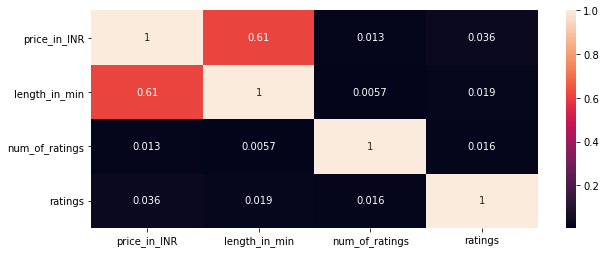

In [44]:
# see if there are any correlations
plt.figure(figsize = (10,4))
sns.heatmap(round(audible[['price_in_INR', 'length_in_min', 'num_of_ratings', 'ratings']].corr(),4), annot= True)
plt.show()
# there is a moderately strong correlation between price and length of the book, 
# which may be a reasonabe thing - more resources are required to create longer audio books

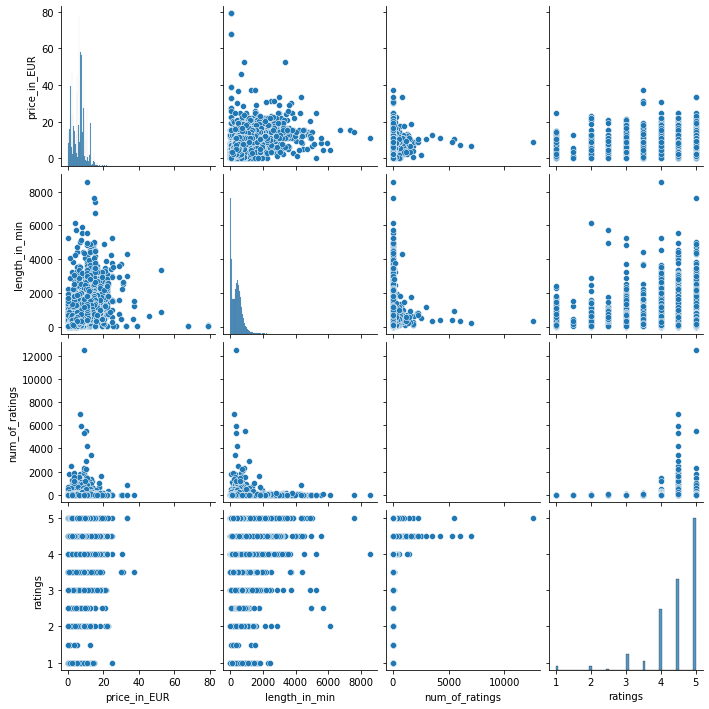

In [45]:
sns.pairplot(audible[['price_in_EUR', 'length_in_min', 'num_of_ratings', 'ratings']])
plt.show()

# Rating vs number of ratings
## even though there was no correlation between number of ratings and overall rating in the matrix above,
## all outliers in terms of number of ratings have the highest rating. Maybe users tend to rate books 
## if they have stronger positive impression. In order to see if this is true, more granular data by user and 
## all her/his books with rating will be great to look into

# majority of books have rating over 4

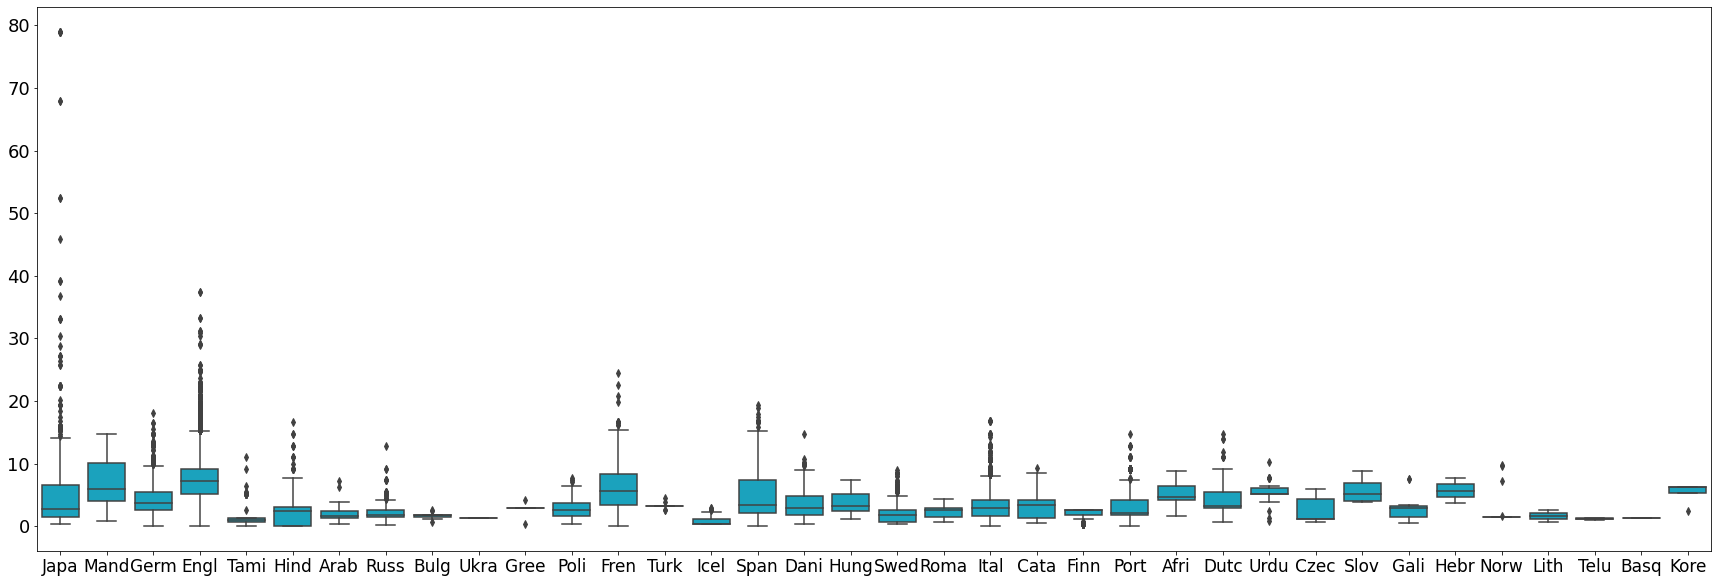

In [46]:
# let's take a look at the distribution of prices by language
plt.figure(figsize = (30,10))
sns.boxplot(y = 'price_in_EUR', x = audible['language'].str[:4], data = audible, color = '#00b4d8')
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 18)
plt.show()

# as was already shown above the most expensive books are in Japanese, but also in English and French

In [54]:
audible[audible['language'] == 'Icelandic']

,name,author,narrator,releasedate,language,length_in_min,length_in_hrs,num_of_ratings,ratings,max_rating,price_in_INR,price_in_EUR
4582,Þyrnirós,Grimmsbr ur The d r rnason translator,rni Beinteinn rnason,2022-01-31,Icelandic,9,0.15,NaN,NaN,5,32.0,0.35
4574,Þrastarskeggur,Grimmsbr ur The d r rnason translator,rni Beinteinn rnason,2022-01-31,Icelandic,10,0.17,NaN,NaN,5,32.0,0.35
4591,Úlfurinn og maðurinn,Grimmsbr ur The d r rnason translator,rni Beinteinn rnason,2022-01-31,Icelandic,2,0.03,NaN,NaN,5,32.0,0.35
4596,Úlfurinn og kiðlingarnir sjö,Grimmsbr ur The d r rnason translator,rni Beinteinn rnason,2022-01-31,Icelandic,7,0.12,NaN,NaN,5,32.0,0.35
4601,Öskubuska,Grimmsbr ur The d r rnason,rni Beinteinn rnason,2022-01-26,Icelandic,17,0.28,NaN,NaN,5,99.0,1.09
4608,"Ævintýrið um piltinn, sem fór út í heiminn til...",Grimmsbr ur The d r rnason translator,rni Beinteinn rnason,2022-01-26,Icelandic,24,0.40,NaN,NaN,5,99.0,1.09
73538,Vængir ástarinnar,Barbara Cartland Sigur ur Steinsson,Tinna Hrafnsd ttir,2021-12-22,Icelandic,325,5.42,NaN,NaN,5,267.0,2.93
72230,Við Kristján,Line Kyed Knudsen Hilda Gerd Birgisd ttir,Tinna Hrafnsd ttir,2021-11-18,Icelandic,110,1.83,NaN,NaN,5,200.0,2.19
4579,Tvíeyringurinn,Grimmsbr ur The d r rnason translator,rni Beinteinn rnason,2022-01-31,Icelandic,2,0.03,NaN,NaN,5,32.0,0.35
19091,Tolkien - ævisaga,Michael White,Hj lmar Hj lmarsson,2020-01-16,Icelandic,457,7.62,NaN,NaN,5,233.0,2.56


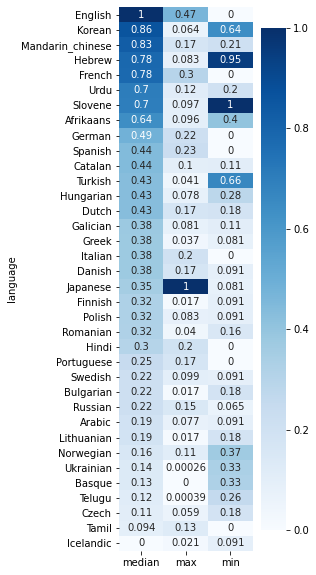

In [52]:
# looking closer the median, min, max prices by language
prices = (audible.groupby('language')['price_in_EUR']
                 .agg(['median', 'max', 'min'])
                 .reset_index()
                 .sort_values('median')
                 .set_index('language'))

# normalizing values within columns to create a heatmap with a proper coloring
prices = (prices - prices.min()) / (prices.max() - prices.min())

plt.figure(figsize = (3,10))
sns.heatmap(prices.sort_values('median', ascending = False), cmap="Blues", annot = True)
plt.show()

# While the most expensive books are Japanese, the median price is the highest in English. 
# But there is a big difference in the number of books by language, so not all this data can be used to make conclusions
# e.g. Korean has a very high median, but there are only 4 books, compared to 57758 in English or 3156 in Japanese

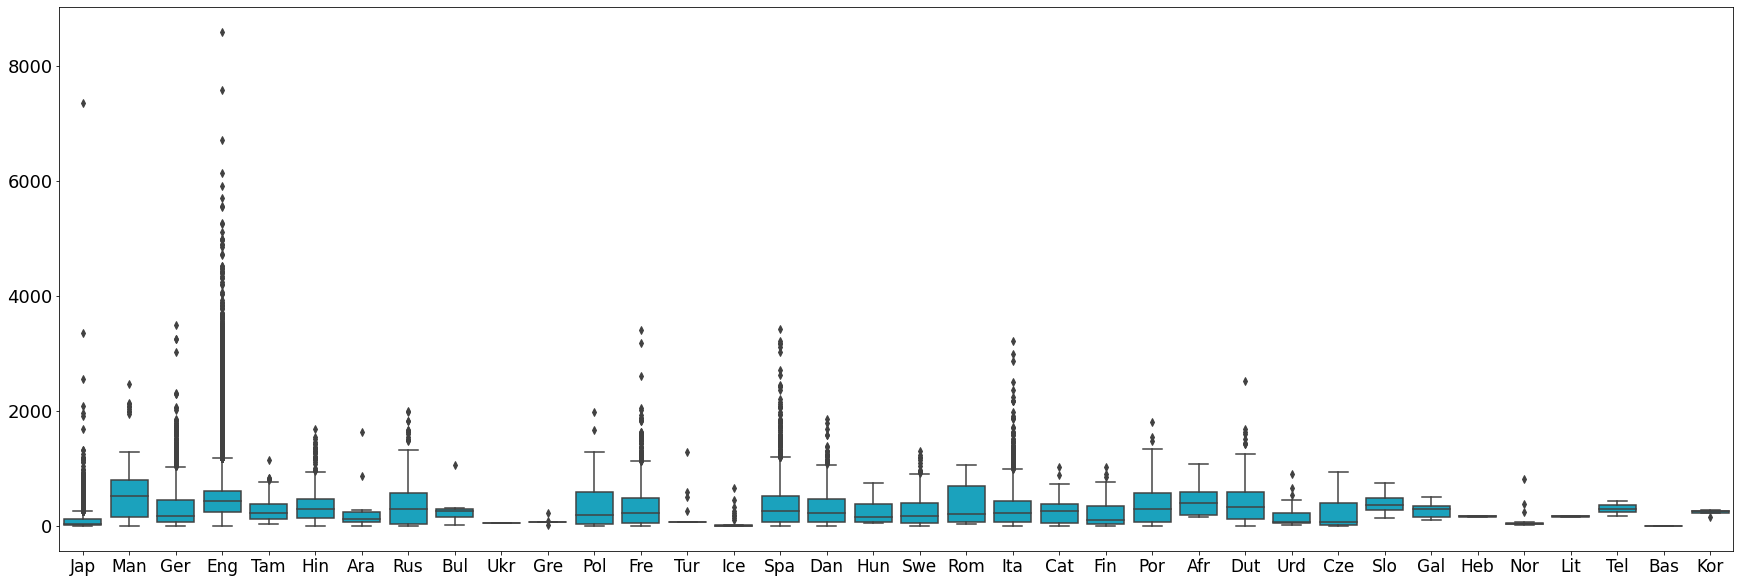

In [48]:
# let's take a look at the destribution of length by language
plt.figure(figsize = (30,10))
sns.boxplot(y = 'length_in_min', x = audible['language'].str[:3], data = audible, color = '#00b4d8')
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 18)
plt.show()

In [49]:
# let's take a look at the ratings
audible.pivot_table(index='language', 
                    columns= ['ratings'], 
                    values='num_of_ratings', 
                    aggfunc='count').fillna('')

ratings,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
language,,,,,,,,,
Arabic,1.0,,,,,,,,
Danish,3.0,,,,,,,,
English,151.0,8.0,174.0,46.0,686.0,399.0,2647.0,3861.0,6580.0
French,1.0,,,,,,1.0,,3.0
German,9.0,,,1.0,3.0,1.0,4.0,1.0,18.0
Hindi,6.0,,4.0,,14.0,10.0,51.0,136.0,100.0
Italian,3.0,,,,,,,,1.0
Polish,,,1.0,,,,,,
Russian,,,1.0,,,,,,
